In [30]:
# Importing the Dependencies
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [31]:
# Importing FashionMNSIT Dataset to Train
from torchvision import datasets
train_data = datasets.FashionMNIST(root = 'data', train=True, download=True, transform=ToTensor(),target_transform=None)
test_data = datasets.FashionMNIST(root = 'data', train=False, download=True, transform=ToTensor(),target_transform=None)

In [32]:
# Check for Cuda Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [33]:
# Listing of train/test data
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

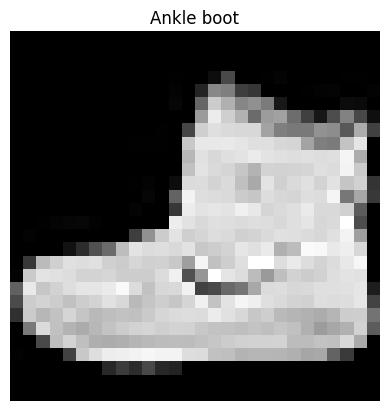

In [34]:
# Image output from Dataset
image, label = train_data[0]
image.shape
plt.imshow(image.squeeze(), cmap='gray')
class_names = train_data.classes
plt.title(class_names[label])
plt.axis(False)

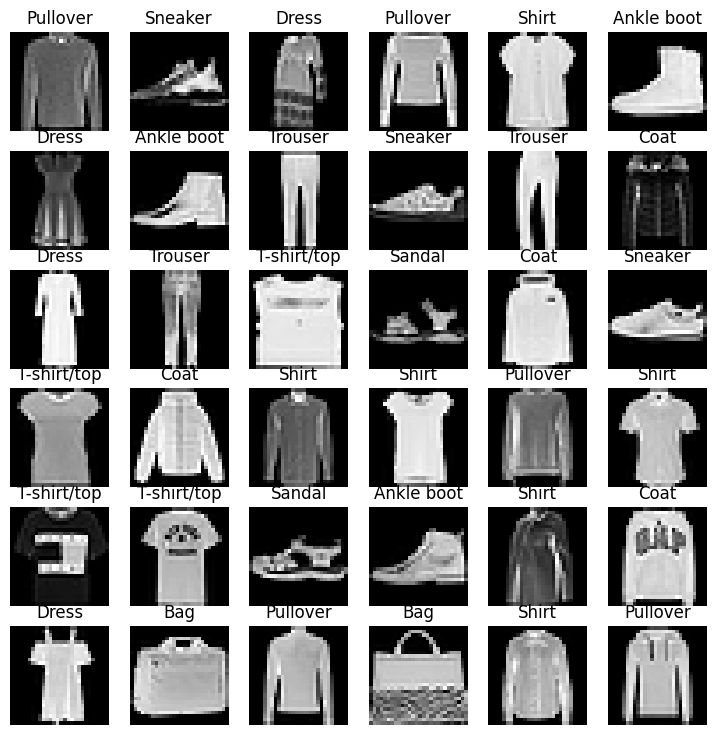

In [35]:
# Images from Dataset are plotted
torch.manual_seed(67)
fig = plt.figure(figsize=(9,9))
rows, col = 6, 6
for i in range(1, rows*col+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows,col,i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

In [36]:
# Train/Test Data is Loaded and Divided into Batches to train the Model
from torch.utils.data import DataLoader
batch = 32
train_dataloader = DataLoader(dataset = train_data, batch_size=batch, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size=batch, shuffle = True)
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_dataloader, test_dataloader, train_features_batch.shape, train_labels_batch.shape

(<torch.utils.data.dataloader.DataLoader at 0x787520ccb390>,
 torch.Size([32, 1, 28, 28]),
 torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 3, Label size: torch.Size([])


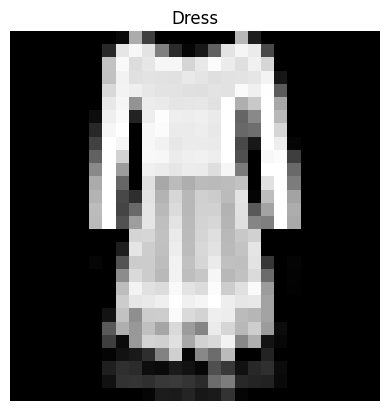

In [37]:
# Image is output from the loaded Train Data batch 
torch.manual_seed(54)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

In [38]:
# Train Features Batch is input in the Flatten Model
the_flatten_model = nn.Flatten()
x = train_features_batch[0]
output = the_flatten_model(x)
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [39]:
# Creation of FashionMNSIT0 Model of Sequential Layer
class FashionMNIST0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
               nn.Linear(in_features= input_shape, out_features= hidden_units),
               nn.Linear(in_features= hidden_units, out_features= output_shape))
    def forward (self, x):
        return self.layer_stack(x)
    
torch.manual_seed(54)
model_0 = FashionMNIST0(input_shape=784, hidden_units=10, output_shape=len(class_names)).to('cpu')
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0048,  0.0105,  0.0350,  ..., -0.0073, -0.0148,  0.0155],
                      [-0.0010,  0.0154, -0.0201,  ..., -0.0016, -0.0308, -0.0136],
                      [ 0.0310,  0.0236,  0.0022,  ..., -0.0248, -0.0297,  0.0322],
                      ...,
                      [ 0.0223, -0.0187, -0.0324,  ...,  0.0321, -0.0055,  0.0224],
                      [-0.0029,  0.0055, -0.0031,  ..., -0.0168, -0.0315, -0.0326],
                      [ 0.0086, -0.0148, -0.0176,  ...,  0.0263, -0.0341,  0.0180]])),
             ('layer_stack.1.bias',
              tensor([ 0.0175, -0.0333,  0.0120, -0.0131,  0.0157, -0.0094,  0.0133, -0.0190,
                      -0.0098,  0.0128])),
             ('layer_stack.2.weight',
              tensor([[-0.2332, -0.2071,  0.1406,  0.0911,  0.2594,  0.2039,  0.0819,  0.1861,
                       -0.1327,  0.2995],
                      [-0.2768,  0.1103, -0.0652, -0.0350,  0.2131,  0.1440, -0.

In [40]:
# Tensor is loaded in the model
tensor = torch.rand([1, 1, 28, 28])
model_0(tensor)

tensor([[-0.3026,  0.2656,  0.1274,  0.4819,  0.1445, -0.1301, -0.2700,  0.4325,
         -0.3441,  0.5857]], grad_fn=<AddmmBackward0>)

In [41]:
# Input of Loss Function, Optimizer and Accuracy Function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=model_0.parameters(), lr=0.1) 

In [42]:
# Training time calculation
from timeit import default_timer as timer
def train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [43]:
# Creating a CPU train timer
start_time = timer()

end_time = timer()
print(f"Start time: {start_time}, End time: {end_time}")
train_time(start_time, end_time, 'cpu')

Start time: 3183.178915286, End time: 3183.17892774
Train time on cpu: 0.000 seconds


1.245399971594452e-05

In [44]:
# Model_0 is trained and evaluated using batched data via training and testing loops.
from tqdm.auto import tqdm

torch.manual_seed(67)
training_start_time = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    
    train_loss_epoch = 0
    
    for batch, (X,y) in enumerate(train_dataloader):
        
        model_0.train()
        
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y) 
        train_loss_epoch += loss.item()
        
        optim.zero_grad()
        
        loss.backward()
        
        optim.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
    avg_train_loss = train_loss_epoch / len(train_dataloader)
    
    test_loss, test_acc = 0, 0
    
    model_0.eval()
    
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            
            test_pred = model_0(X_test)
            
            test_loss += loss_fn(test_pred, y_test).item()

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        avg_test_loss = test_loss / len(test_dataloader)
        avg_test_acc = test_acc / len(test_dataloader)
            
        print(f"\nTrain loss: {avg_train_loss:.4f} | Test loss: {avg_test_loss:.4f}, Test acc: {avg_test_acc:.4f}%")
        
training_end_time = timer()
train_time(start=training_start_time, end=training_end_time, device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5834 | Test loss: 0.5261, Test acc: 80.8606%
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4734 | Test loss: 0.5025, Test acc: 82.5579%
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4550 | Test loss: 0.4953, Test acc: 82.7975%
Epoch: 3
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4437 | Test loss: 0.5141, Test acc: 82.1286%
Epoch: 4
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400

16.183778002000054

In [45]:
# Run inference and obtain evaluation metrics for Model_0
torch.manual_seed(67)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)
            
            loss += loss_fn(y_pred, y).item()
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        # Calculate averages AFTER the loop
        loss /= len(data_loader)
        acc /= len(data_loader)
            
        return {"Model_Name": model.__class__.__name__,
                "Model_Loss": loss,
                "Model_accuracy": acc}

Model0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

Model0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'FashionMNIST0',
 'Model_Loss': 0.4969978601026078,
 'Model_accuracy': 82.30830670926518}

In [46]:
!nvidia-smi

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.cuda.is_available()

Mon Jun  9 08:54:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.57.04              Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   54C    P8              4W /  115W |     404MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

True

In [47]:
# Creation of FashionMNSIT1 Model of Sequential Layer using ReLU 
class FashionMNIST1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
               nn.Linear(in_features= input_shape, out_features= hidden_units),
               nn.ReLU(),
               nn.Linear(in_features= hidden_units, out_features= output_shape),
               nn.ReLU())
        
    def forward (self, x: torch.Tensor):
        return self.layer_stack(x)
    
torch.manual_seed(54)
model_1 = FashionMNIST1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0048,  0.0105,  0.0350,  ..., -0.0073, -0.0148,  0.0155],
                      [-0.0010,  0.0154, -0.0201,  ..., -0.0016, -0.0308, -0.0136],
                      [ 0.0310,  0.0236,  0.0022,  ..., -0.0248, -0.0297,  0.0322],
                      ...,
                      [ 0.0223, -0.0187, -0.0324,  ...,  0.0321, -0.0055,  0.0224],
                      [-0.0029,  0.0055, -0.0031,  ..., -0.0168, -0.0315, -0.0326],
                      [ 0.0086, -0.0148, -0.0176,  ...,  0.0263, -0.0341,  0.0180]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0175, -0.0333,  0.0120, -0.0131,  0.0157, -0.0094,  0.0133, -0.0190,
                      -0.0098,  0.0128], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[-0.2332, -0.2071,  0.1406,  0.0911,  0.2594,  0.2039,  0.0819,  0.1861,
                       -0.1327,  0.2995],
                      [-0

In [48]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [49]:
# Input of Loss Function, Optimizer and Accuracy Function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [50]:
# Training step function for model_1
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss_epoch, train_acc = 0, 0
    
    model.train()
    
    for batch, (X,y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y) 
        train_loss_epoch += loss.item()
        train_acc += accuracy_fn(y_true=y,
                                 y_pred = y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()

    avg_train_loss = train_loss_epoch / len(data_loader)
    avg_train_acc = train_acc / len(data_loader)
    print(f"Train loss: {avg_train_loss:.5f} | Train acc: {avg_train_acc:.2f}%")


In [51]:
# Test step function for model_1
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    
    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            test_pred = model(X_test)
            
            test_loss += loss_fn(test_pred, y_test).item()

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        avg_test_loss = test_loss / len(data_loader)
        avg_test_acc = test_acc / len(data_loader)
            
        print(f"\nTest loss: {avg_test_loss:.4f}, Test acc: {avg_test_acc:.4f}%\n")
        
    return {"test_loss": avg_test_loss, "test_acc": avg_test_acc}

In [52]:
# Training and testing loop for model_1 on GPU
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu = timer()
epochs = 3

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-----")
    
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optim,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print(f"Train time on {device}: {train_time_end_on_gpu - train_time_start_on_gpu:.3f} seconds")

Epoch: 0
-----
Train loss: 0.63710 | Train acc: 77.58%

Test loss: 0.4981, Test acc: 82.2983%

Epoch: 1
-----
Train loss: 0.47828 | Train acc: 82.91%

Test loss: 0.5311, Test acc: 81.4597%

Epoch: 2
-----
Train loss: 0.44874 | Train acc: 83.81%

Test loss: 0.4859, Test acc: 83.2169%

Train time on cuda: 13.408 seconds


In [53]:
# Run inference and obtain evaluation metrics for Model_1
torch.manual_seed(67)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Move tensors to the correct device
            X, y = X.to(device), y.to(device)
            
            y_pred = model(X)
            
            loss += loss_fn(y_pred, y).item()
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
        
        # Calculate averages AFTER the loop
        loss /= len(data_loader)
        acc /= len(data_loader)
            
        return {"Model_Name": model.__class__.__name__,
                "Model_Loss": loss,
                "Model_accuracy": acc}
        
model_1_results = eval_model(model=model_1,
                           data_loader=test_dataloader,
                             loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'FashionMNIST1',
 'Model_Loss': 0.4851066072385151,
 'Model_accuracy': 83.24680511182109}